# Module 3: Network Analysis / Networks: Written Analysis, Peer Review and Discussion

In this problem, you will study a time-varying criminal network that is repeatedly disturbed by police forces. The data for this problem can be found in the CAVIAR directory of the data archive.

The CAVIAR investigation lasted two years and ran from 1994 to 1996. The operation brought together investigation units of the Montréal police and the Royal Canadian Mounted Police of Canada. During this two year period, 11 wiretap warrants, valid for a period of about two months each, were obtained (the 11 matrices contained in phase1.csv, phase2.csv, … correspond to these eleven, two month wiretap phases).

This case is interesting because, unlike other investigative strategies, the mandate of the CAVIAR project was to seize the drugs without arresting the perpetrators. During this period, imports of the trafficking network were hit by the police on eleven occasions. The arrests took place only at the end of the investigation. Monetary losses for traffickers were estimated at 32 million dollars. Eleven seizures took place throughout the investigation. Some phases included no seizures, and others included multiple. 

In the data files (phase1.csv, phase2.csv, …), you will find matrices that report the number of wiretapped correspondences between the above players in the network, where players are identified by their unique id. You will be analyzing this time-varying network, giving a rough sketch of its shape, its evolution and the role of the actors in it.

In [1]:
import pandas as pd
import networkx as nx
phases = {}
G = {}
for i in range(1,12): 
  var_name = "phase" + str(i)
  file_name = "https://raw.githubusercontent.com/ragini30/Networks-Homework/main/" + var_name + ".csv"
  phases[i] = pd.read_csv(file_name, index_col = ["players"])
  phases[i].columns = "n" + phases[i].columns
  phases[i].index = phases[i].columns
  phases[i][phases[i] > 0] = 1
  G[i] = nx.from_pandas_adjacency(phases[i])
  G[i].name = var_name

What is the size of the network at each phase? Plot the evolution of the number of node and number of edges over time, from phase 1 to 11.

Provide the number of nodes and edges for the three phases listed below:
## Part 2 (c)

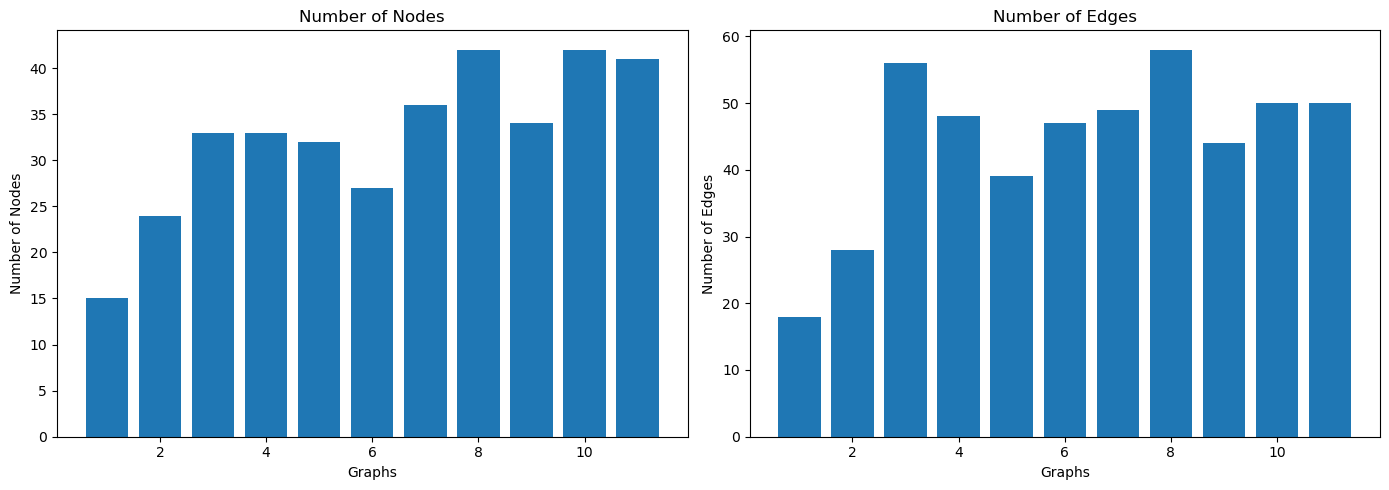

In [2]:
import matplotlib.pyplot as plt



# Lists to store the number of nodes and edges for each graph
num_nodes_list = []
num_edges_list = []

# Iterate through the dictionary and gather information
for graph_name, graph in G.items():
    num_nodes = graph.number_of_nodes()
    num_edges = graph.number_of_edges()

    num_nodes_list.append(num_nodes)
    num_edges_list.append(num_edges)

# Create plots
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.bar(G.keys(), num_nodes_list)
plt.title("Number of Nodes")
plt.xlabel("Graphs")
plt.ylabel("Number of Nodes")

plt.subplot(1, 2, 2)
plt.bar(G.keys(), num_edges_list)
plt.title("Number of Edges")
plt.xlabel("Graphs")
plt.ylabel("Number of Edges")

plt.tight_layout()

# Show the plots
plt.show()


In [5]:
# Mean betweenness centrality
# Create a set to keep track of all unique nodes
all_nodes = set()

# Iterate through the graphs to collect all unique nodes
for graph_name, graph in G.items():
    all_nodes.update(graph.nodes())
    
# Sort the nodes alphabetically
sorted_nodes = sorted(all_nodes)

# Iterate through the graphs and add nodes in alphabetical order
for graph_name, graph in G.items():
    missing_nodes = set(sorted_nodes) - set(graph.nodes())
    for node in missing_nodes:
        graph.add_node(node)
        

In [6]:
# Create a list of key players sorted by id betweenness
key_players = list(all_nodes)
key_players.sort(key=lambda x: int(x[1:]))

# Create a Pandas dataframe with the key players' id as the id for the rows and the phases as the id for the columns
metric_matrix = pd.DataFrame(index=key_players, columns=[f"Phase {i}" for i in range(1, 12)])

# For each phase
for i in range(1,12):
    # Get the graph for this phase (i)
    g = G[i]

   #Code from discussion boads
    metric = nx.betweenness_centrality(g, normalized = True)

    for key, value in metric.items():
        metric_matrix[f"Phase {i}"][key] = value
        
metric_matrix['Mean Betweenness'] = metric_matrix.mean(axis =1)
metric_matrix.sort_values(by='Mean Betweenness', ascending=False)

,Phase 1,Phase 2,Phase 3,Phase 4,Phase 5,Phase 6,Phase 7,Phase 8,Phase 9,Phase 10,Phase 11,Mean Betweenness
n1,0.014825,0.042857,0.073932,0.074806,0.073854,0.031686,0.063013,0.081581,0.02363,0.050494,0.073765,0.054949
n12,0.0,0.0,0.0,0.0,0.022552,0.022312,0.001797,0.052561,0.033902,0.004492,0.060258,0.017989
n3,0.0,0.00009,0.008512,0.008061,0.003684,0.013267,0.007847,0.046361,0.054672,0.0,0.0,0.012954
n76,0.0,0.001737,0.0,0.0,0.0,0.00575,0.014376,0.01743,0.012519,0.010063,0.046541,0.009856
n87,0.0,0.0,0.0,0.0,0.0,0.0,0.00021,0.026146,0.022417,0.027763,0.009883,0.007856
...,...,...,...,...,...,...,...,...,...,...,...,...
n47,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
n46,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
n45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
n44,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [8]:
metric_matrix.to_csv('betweenness.csv')


In [ ]:
#mean bettweeness, eigen, degree for each phase

In [9]:
# Create a list of key players sorted by id
key_players = list(all_nodes)
key_players.sort(key=lambda x: int(x[1:]))

# Create a Pandas dataframe with the key players' id as the id for the rows and the phases as the id for the columns
metric_matrix_eigen = pd.DataFrame(index=key_players, columns=[f"Phase {i}" for i in range(1, 12)])

# For each phase
for i in range(1,12):
    # Get the graph for this phase (i)
    g = G[i]

    # Calculate metric. NetworkX returns dictionaries with node (player) id as the key and the metric as the value. CHANGE THIS LINE
    metric = nx.eigenvector_centrality(g)

    for key, value in metric.items():
        metric_matrix_eigen[f"Phase {i}"][key] = value
        
metric_matrix_eigen['Mean Eigen'] = metric_matrix_eigen.mean(axis =1)
metric_matrix_eigen.sort_values(by='Mean Eigen', ascending=False)

,Phase 1,Phase 2,Phase 3,Phase 4,Phase 5,Phase 6,Phase 7,Phase 8,Phase 9,Phase 10,Phase 11,Mean Eigen
n1,0.626448,0.673919,0.593884,0.610383,0.640203,0.496651,0.601984,0.544129,0.458955,0.508022,0.255775,5.463955e-01
n3,0.253842,0.239087,0.291305,0.27263,0.275675,0.454882,0.372468,0.433008,0.46799,0.10389,0.114257,2.980942e-01
n85,0.312668,0.072783,0.162067,0.25166,0.181264,0.24701,0.19936,0.20077,0.19309,0.161136,0.11495,1.906145e-01
n76,0.0,0.160875,0.116135,0.149336,0.151996,0.296569,0.157033,0.215289,0.282705,0.143088,0.151668,1.658814e-01
n83,0.219311,0.152262,0.277497,0.271014,0.126703,0.148739,0.200263,0.092744,0.09178,0.108425,0.0,1.535216e-01
...,...,...,...,...,...,...,...,...,...,...,...,...
n80,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00985,0.0,0.0,0.0,8.954531e-04
n24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000036,0.006944,6.345920e-04
n75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.961083e-08
n103,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.768481e-13


In [10]:
# Create a list of key players sorted by id
key_players = list(all_nodes)
key_players.sort(key=lambda x: int(x[1:]))

# Create a Pandas dataframe with the key players' id as the id for the rows and the phases as the id for the columns
metric_matrix_deg = pd.DataFrame(index=key_players, columns=[f"Phase {i}" for i in range(1, 12)])

# For each phase
for i in range(1,12):
    # Get the graph for this phase (i)
    g = G[i]

    # Calculate metric. NetworkX returns dictionaries with node (player) id as the key and the metric as the value. CHANGE THIS LINE
    metric = nx.degree_centrality(g)

    for key, value in metric.items():
        metric_matrix_deg[f"Phase {i}"][key] = value
        
metric_matrix_deg['Mean Deg'] = metric_matrix_deg.mean(axis =1)
metric_matrix_deg.sort_values(by='Mean Deg', ascending=False)

,Phase 1,Phase 2,Phase 3,Phase 4,Phase 5,Phase 6,Phase 7,Phase 8,Phase 9,Phase 10,Phase 11,Mean Deg
n1,0.113208,0.179245,0.254717,0.216981,0.207547,0.169811,0.226415,0.188679,0.09434,0.122642,0.066038,0.167238
n3,0.018868,0.028302,0.084906,0.066038,0.04717,0.132075,0.09434,0.122642,0.103774,0.009434,0.009434,0.065180
n12,0.0,0.009434,0.018868,0.009434,0.075472,0.09434,0.04717,0.09434,0.075472,0.066038,0.113208,0.054889
n76,0.0,0.018868,0.018868,0.018868,0.018868,0.066038,0.04717,0.056604,0.04717,0.028302,0.066038,0.035163
n85,0.028302,0.018868,0.037736,0.04717,0.028302,0.04717,0.037736,0.028302,0.028302,0.028302,0.028302,0.032590
...,...,...,...,...,...,...,...,...,...,...,...,...
n68,0.0,0.0,0.0,0.0,0.0,0.0,0.009434,0.0,0.0,0.0,0.0,0.000858
n69,0.0,0.0,0.0,0.0,0.0,0.0,0.009434,0.0,0.0,0.0,0.0,0.000858
n70,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.009434,0.0,0.000858
n72,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.009434,0.000858


In [11]:
resumen = pd.DataFrame()
#metric_matrix_bet['Mean Betweenness'] metric_matrix_deg['Mean Deg'] metric_matrix_eigen['Mean Eigen']
merged_df_1 = pd.merge(metric_matrix['Mean Betweenness'], metric_matrix_deg['Mean Deg'], left_index=True, right_index=True, how='inner')
merged_df_2 = pd.merge(merged_df_1, metric_matrix_eigen['Mean Eigen'], left_index=True, right_index=True, how='inner').sort_values(by = ['Mean Eigen'], ascending=False)

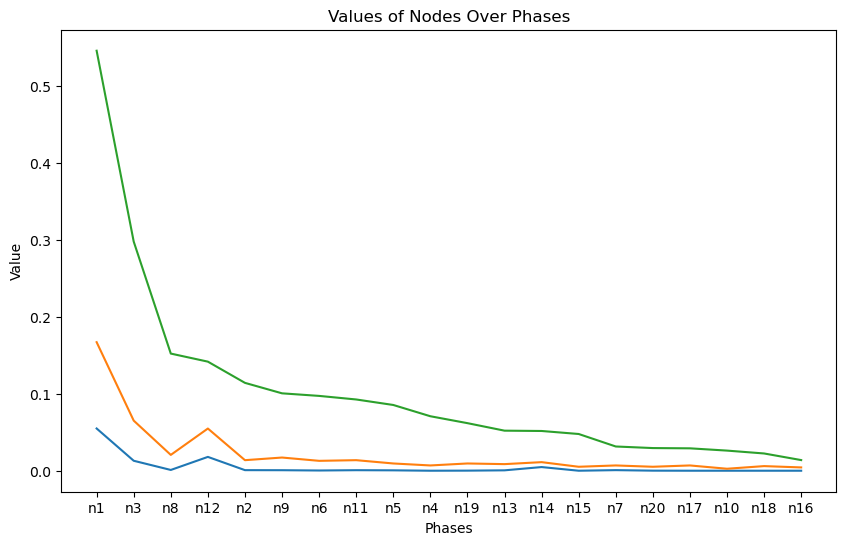

In [12]:
merged_df_2 = merged_df_2[:20]

merged_df_2 = merged_df_2.transpose()


#omit nodes with low mean centrality

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))


# Iterate through each row (node) in the DataFrame
for i, node in enumerate(merged_df_2.index):
    # Get the values for the current node
    values = merged_df_2.loc[node]

    # Plot the values for each node with a unique color
    ax.plot(values, label=f'Node {node}')

# Set plot title and labels
plt.title('Values of Nodes Over Phases')
plt.xlabel('Phases')
plt.ylabel('Value')

# Add a legend
#ax.legend()

# Display or save the plot
plt.show()

In [15]:
# Load again to clear noise from all the zeroes I added for the centrality measures and visualize the graphs
phases = {}
G = {}
for i in range(1,12): 
  var_name = "phase" + str(i)
  file_name = "https://raw.githubusercontent.com/ragini30/Networks-Homework/main/" + var_name + ".csv"
  phases[i] = pd.read_csv(file_name, index_col = ["players"])
  phases[i].columns = "n" + phases[i].columns
  phases[i].index = phases[i].columns
  phases[i][phases[i] > 0] = 1
  G[i] = nx.from_pandas_adjacency(phases[i])
  G[i].name = var_name





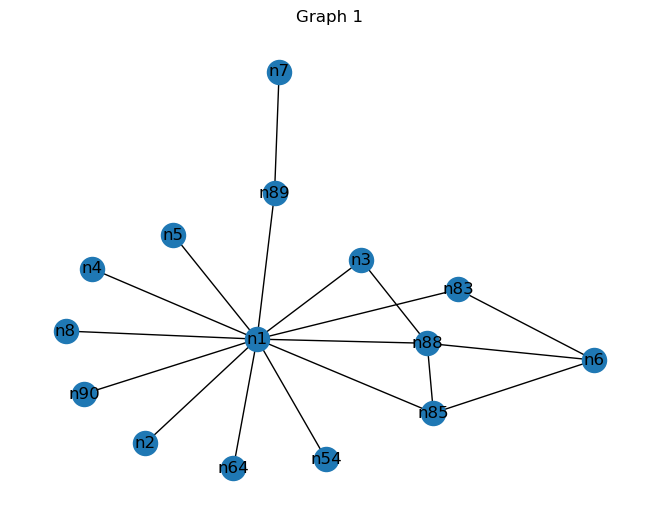

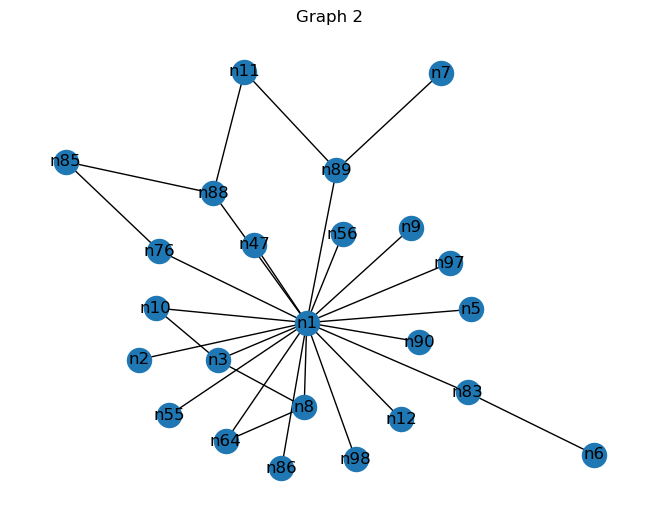

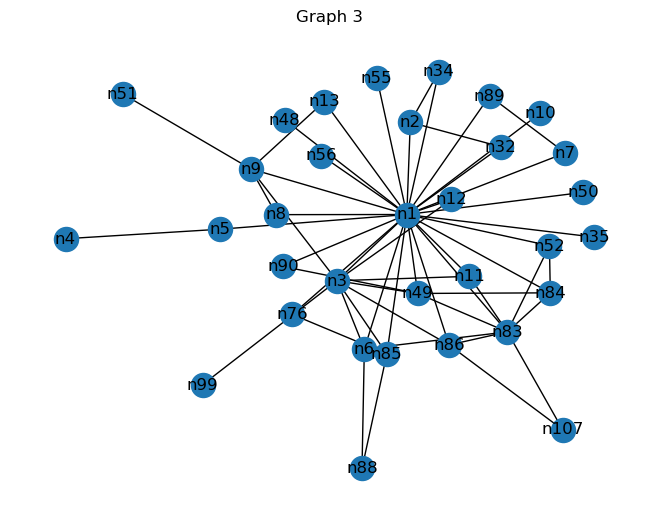

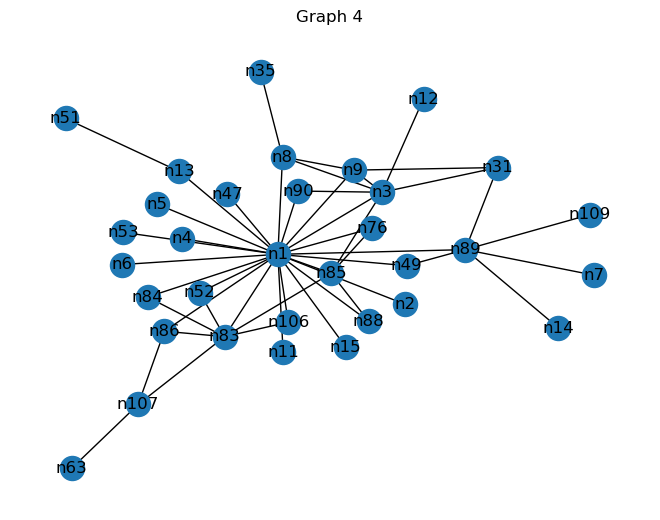

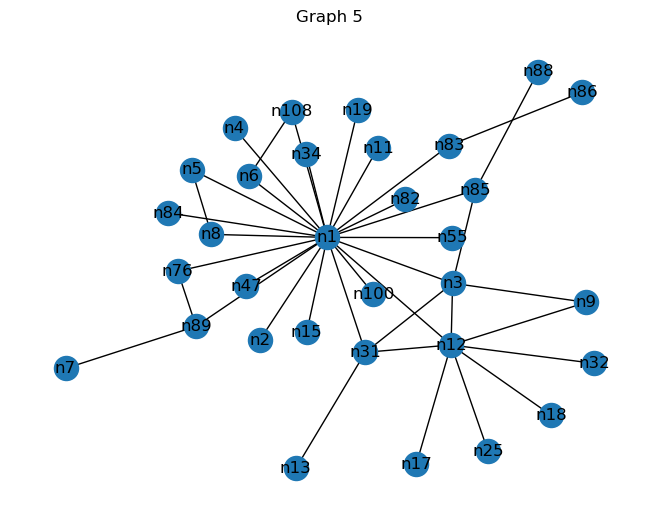

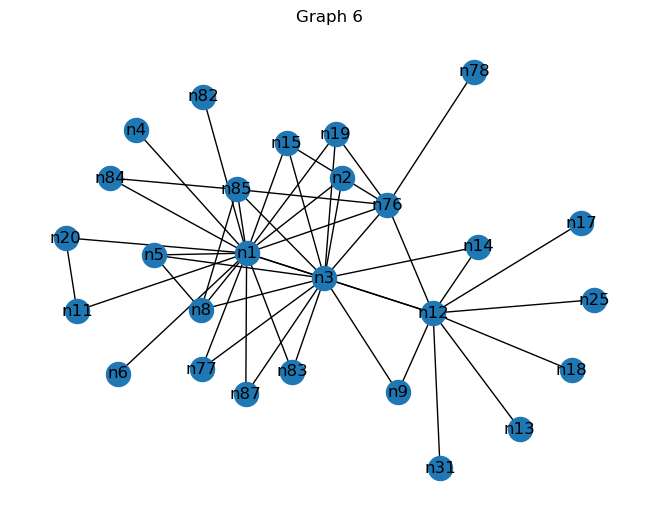

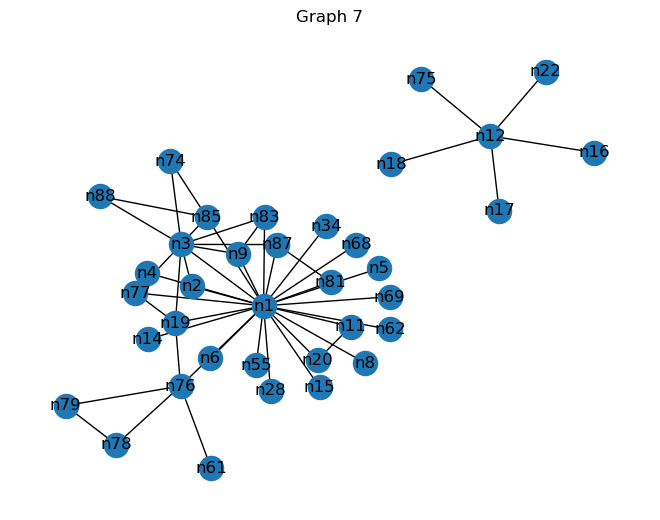

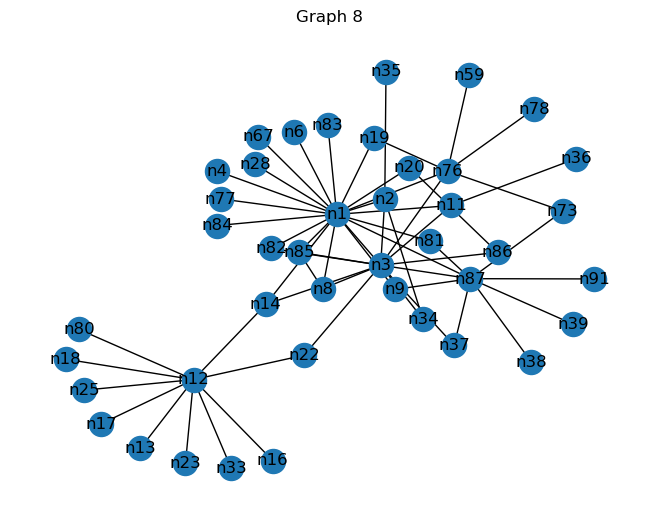

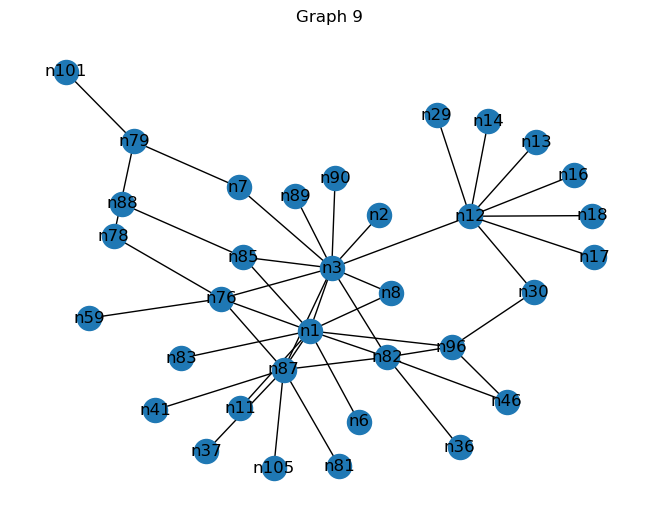

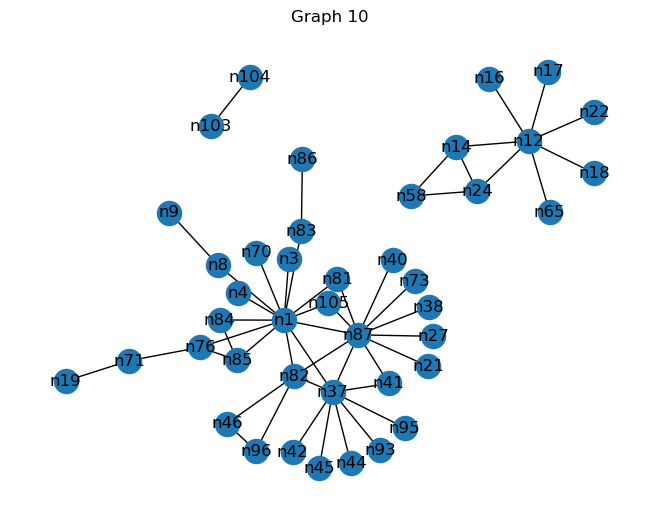

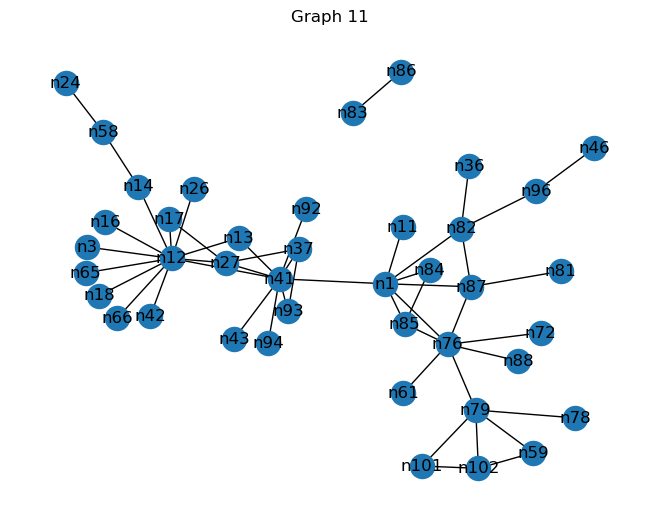

In [16]:
for graph_key in G.keys():
    plt.figure()
    nx.draw(G[graph_key], pos=nx.drawing.nx_agraph.graphviz_layout(G[graph_key]), with_labels=True)  
    plt.title(f'Graph {graph_key}')

# Show the plots
plt.show()

## Directed Graphs

In [23]:

import pandas as pd
import networkx as nx
phases = {}
G = {}
for i in range(1,12): 
  var_name = "phase" + str(i)
  file_name = "https://raw.githubusercontent.com/ragini30/Networks-Homework/main/" + var_name + ".csv"
  phases[i] = pd.read_csv(file_name, index_col = ["players"])
  phases[i].columns = "n" + phases[i].columns
  phases[i].index = phases[i].columns
  phases[i][phases[i] > 0] = 1
  G[i] = nx.from_pandas_adjacency(phases[i],create_using=nx.DiGraph)
  G[i].name = var_name

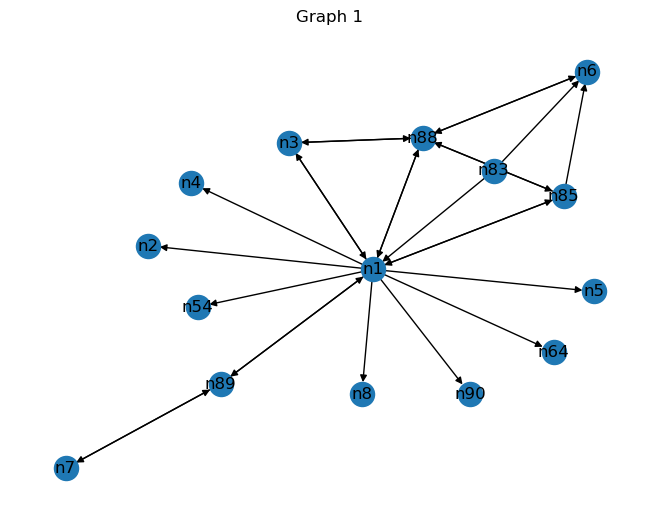

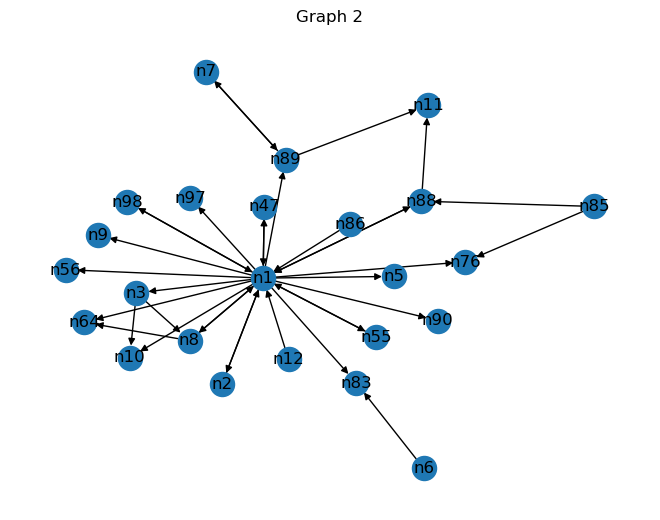

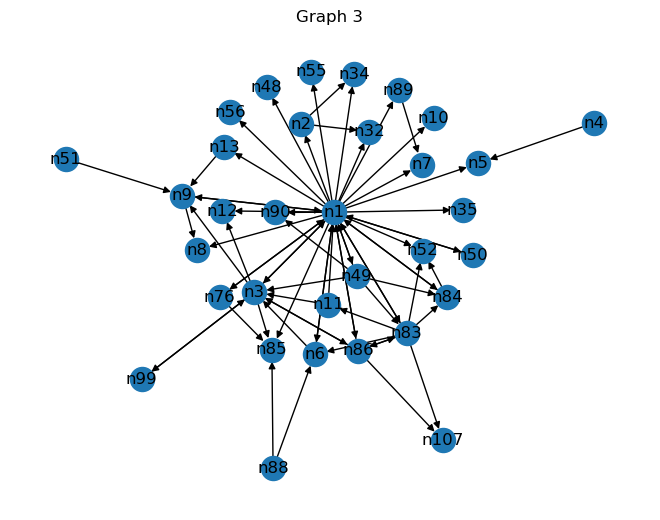

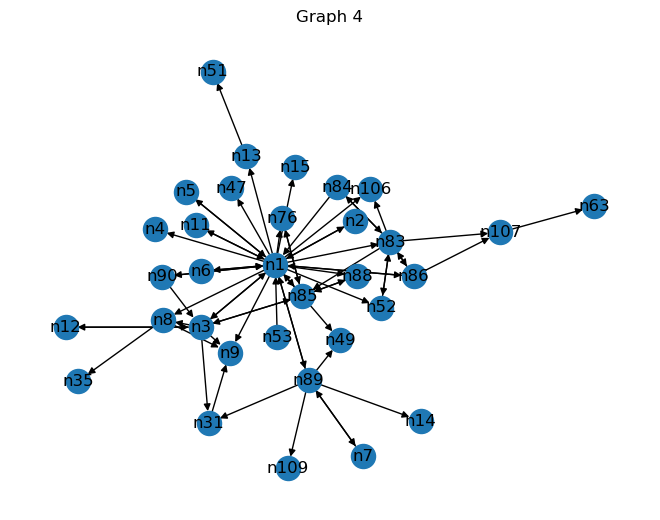

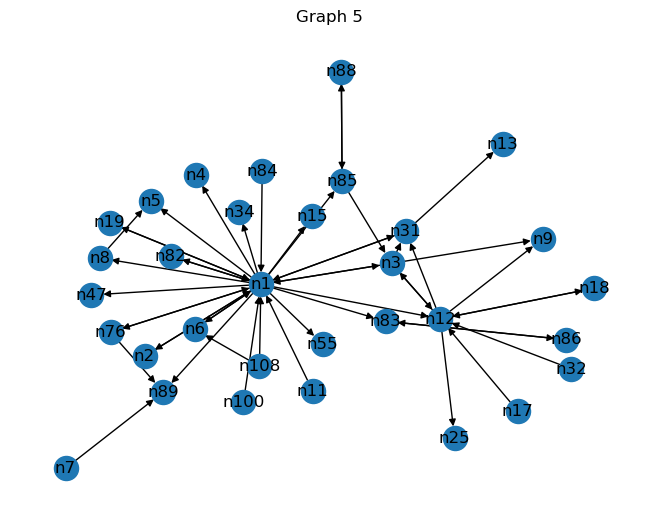

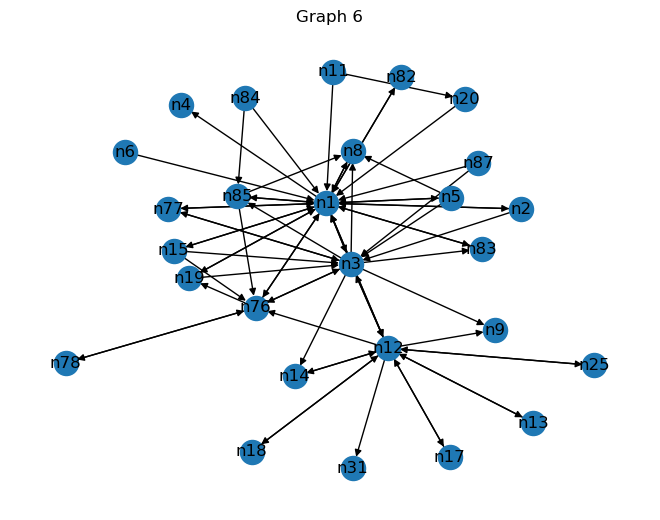

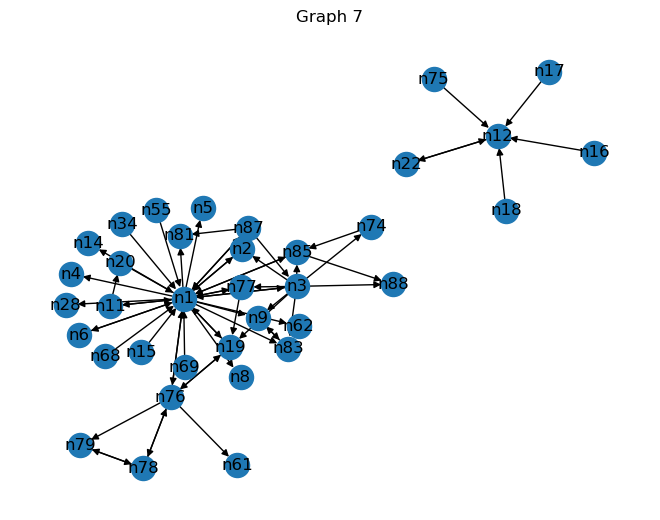

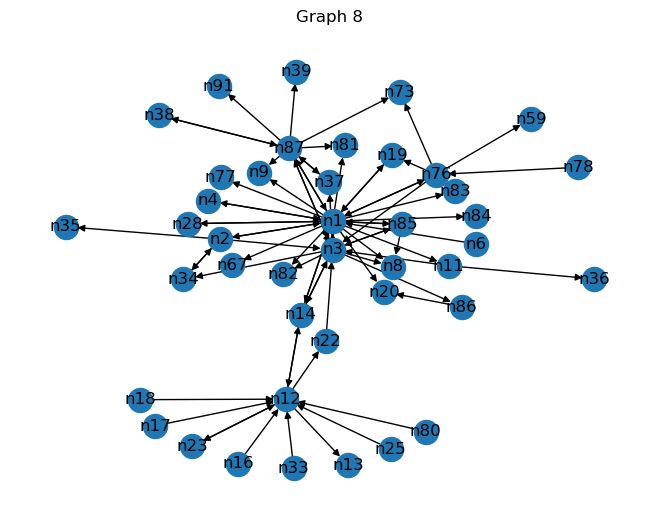

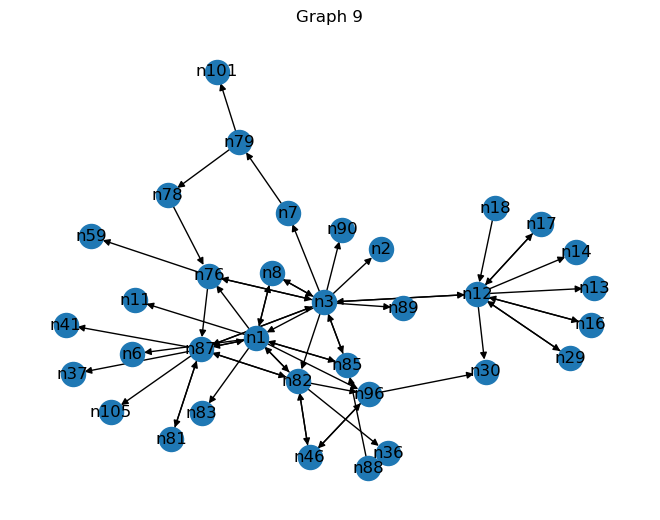

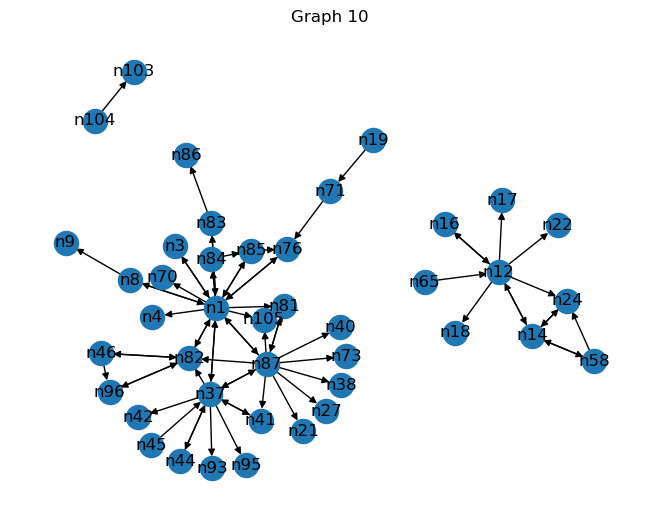

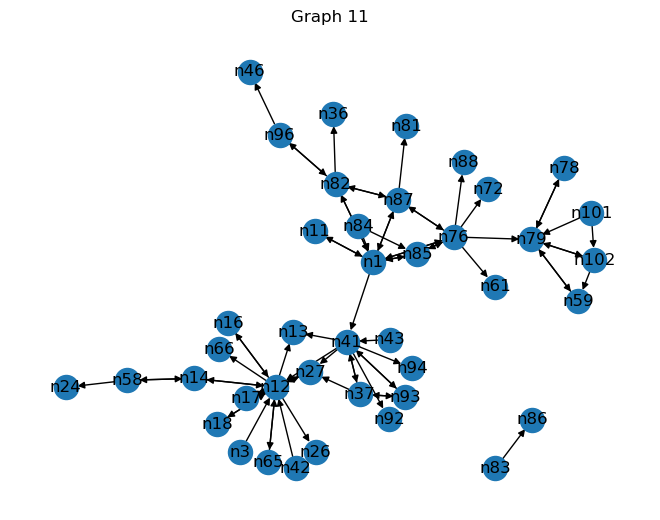

In [18]:
import matplotlib.pyplot as plt
for graph_key in G.keys():
    plt.figure()
    nx.draw(G[graph_key], pos=nx.drawing.nx_agraph.graphviz_layout(G[graph_key]), with_labels=True)  
    plt.title(f'Graph {graph_key}')

# Show the plots
plt.show()

KeyError: '2_Hubs'

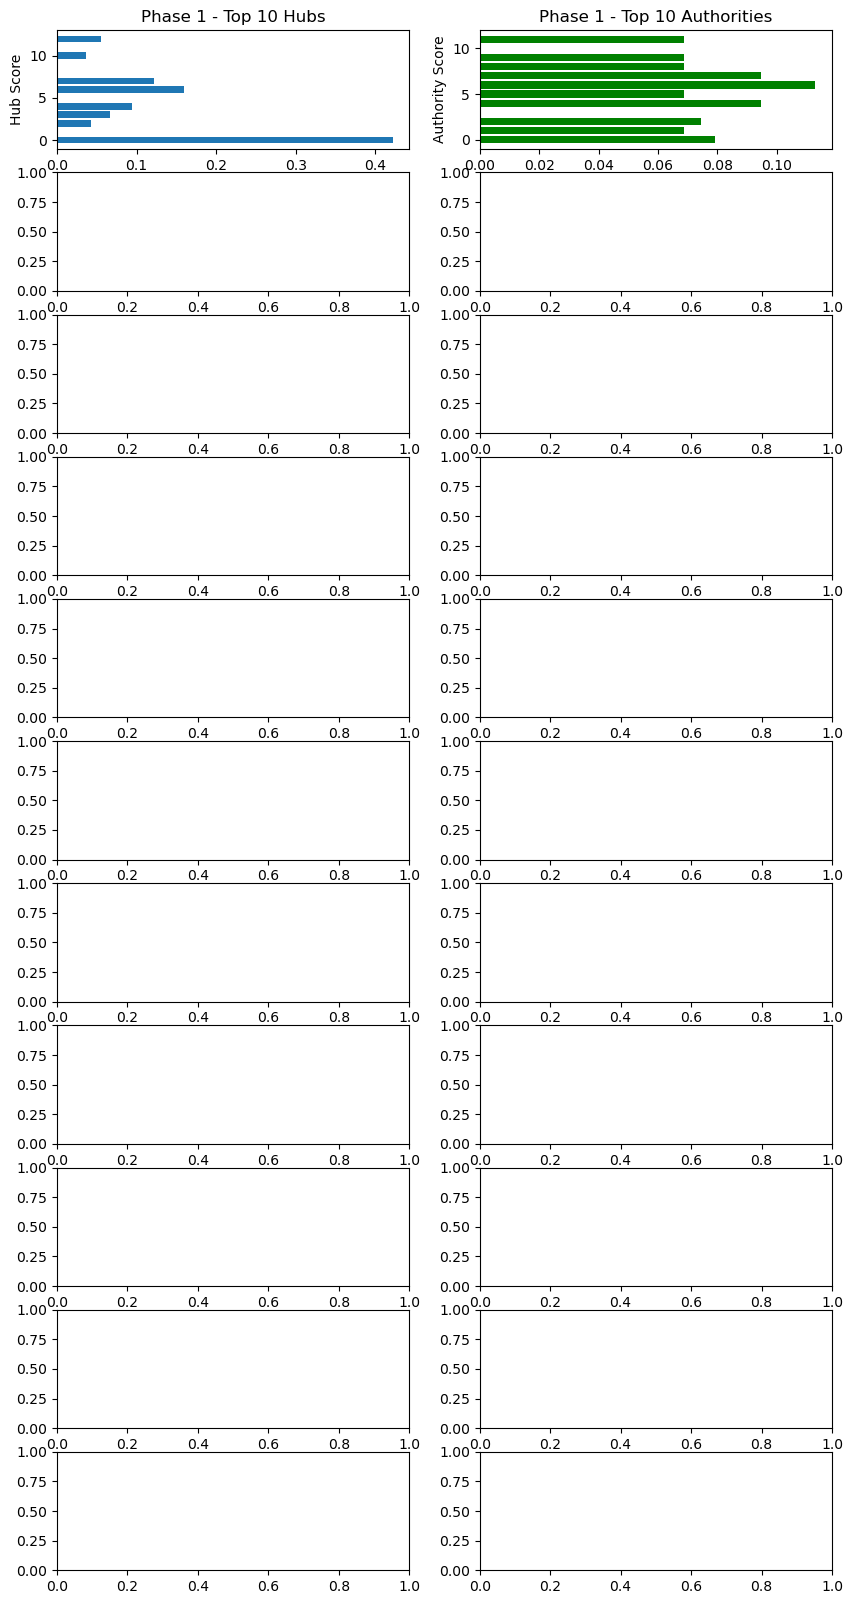

In [25]:
import matplotlib.pyplot as plt

# Create a figure with subplots for each phase
fig, axes = plt.subplots(11, 2, figsize=(10, 20))

# Iterate through each phase
for i, graph_name in enumerate(G.keys()):
    # Sort the hubs and authorities for the current phase
    sorted_hubs = hubs_authorities_df[f"{graph_name}_Hubs"].sort_values(ascending=False)
    sorted_authorities = hubs_authorities_df[f"{graph_name}_Authorities"].sort_values(ascending=False)
    
    # Take the top 3 hubs and authorities
    top_3_hubs = sorted_hubs.head(10)
    top_3_authorities = sorted_authorities.head(10)
    
    # Plot hubs
    axes[i, 0].barh(top_3_hubs.index, top_3_hubs)
    axes[i, 0].set_title(f"Phase {i + 1} - Top 10 Hubs")
    axes[i, 0].set_ylabel("Hub Score")
    
    # Plot authorities
    axes[i, 1].barh(top_3_authorities.index, top_3_authorities, color='green')
    axes[i, 1].set_title(f"Phase {i + 1} - Top 10 Authorities")
    axes[i, 1].set_ylabel("Authority Score")
    
# Adjust the layout and show the plot
plt.tight_layout()
plt.show()


In [26]:
# Calculate the average hub and authority scores for each node
average_hub_scores = hubs_authorities_df.filter(like="_Hubs").mean(axis=1)
average_authority_scores = hubs_authorities_df.filter(like="_Authorities").mean(axis=1)

# Create a new DataFrame to store the average scores
average_scores_df = pd.DataFrame({'Average_Hub_Score': average_hub_scores, 'Average_Authority_Score': average_authority_scores})
average_scores_df.sort_values(['Average_Hub_Score'], ascending = False).head(15)



,Average_Hub_Score,Average_Authority_Score
0,0.421657,0.079101
6,0.159997,0.112959
7,0.122440,0.094653
4,0.094478,0.094653
3,0.066874,0.000000
12,0.055566,0.056844
2,0.042297,0.074588
10,0.036691,0.006883
1,0.000000,0.068617
5,0.000000,0.068617


In [27]:
average_scores_df.sort_values(['Average_Authority_Score'], ascending = False).head(15).drop(columns=['Average_Hub_Score'])

,Average_Authority_Score
6,0.112959
4,0.094653
7,0.094653
0,0.079101
2,0.074588
1,0.068617
5,0.068617
8,0.068617
9,0.068617
11,0.068617
